# Simulate the vnindex in 2023 by simulating Monte Carlo

In this paper, I use the monte carlo simulation to simulate the vnindex in 2023. After testing the stationarity of the yield series, I assume the yield series will follow a normal distribution.

In this study, I use Vietnam stock market index data from 2013 to 2023.

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [143]:
# Loading data
data_vnindex = pd.read_csv(r'C:\Users\DPC\Desktop\project\vnindex_10y.csv')

data_vnindex.head()

,date,price,open,high,low,vol,change
0,2/24/2023,1039.56,1053.66,1053.66,"1,034.66",430.41K,-0.0134
1,2/23/2023,1053.66,1054.28,1054.48,"1,030.58",720.75K,-0.0006
2,2/22/2023,1054.28,1082.23,1082.23,"1,054.28",814.01K,-0.0258
3,2/21/2023,1082.23,1086.69,1095.10,"1,081.80",720.35K,-0.0041
4,2/20/2023,1086.69,1059.74,1088.01,"1,059.56",682.29K,0.0258


In [144]:
# Adf test
from statsmodels.tsa.stattools import adfuller
adfuller(data_vnindex['change'].to_numpy())
# p_value in the 2nd line
# The yield series is stationary

(-33.217898664899614,
 0.0,
 1,
 2495,
 {'1%': -3.4329736635735393,
  '5%': -2.8626991196096556,
  '10%': -2.5673870444295406},
 -15040.432859872119)

In [145]:
# Caculate mean and std of yield series
mean = data_vnindex['change'].to_numpy().mean()
std = data_vnindex['change'].to_numpy().std()
print(len(data_vnindex))
print(mean)
print(std)

2497
0.00037869443331998396
0.011528908599591652


In [146]:
# Random normal distribution
data_vnindex['normal_distribution'] = np.random.normal(loc=0, scale=1, size= len(data_vnindex))
data_vnindex.head()

,date,price,open,high,low,vol,change,normal_distribution
0,2/24/2023,1039.56,1053.66,1053.66,"1,034.66",430.41K,-0.0134,-0.893482
1,2/23/2023,1053.66,1054.28,1054.48,"1,030.58",720.75K,-0.0006,-0.254043
2,2/22/2023,1054.28,1082.23,1082.23,"1,054.28",814.01K,-0.0258,-0.559095
3,2/21/2023,1082.23,1086.69,1095.10,"1,081.80",720.35K,-0.0041,-0.014675
4,2/20/2023,1086.69,1059.74,1088.01,"1,059.56",682.29K,0.0258,-1.063071


In [147]:
# yield series simulation
data_vnindex['yield_series'] = data_vnindex['normal_distribution'] * std+mean
data_vnindex.head()

,date,price,open,high,low,vol,change,normal_distribution,yield_series
0,2/24/2023,1039.56,1053.66,1053.66,"1,034.66",430.41K,-0.0134,-0.893482,-0.009922
1,2/23/2023,1053.66,1054.28,1054.48,"1,030.58",720.75K,-0.0006,-0.254043,-0.002550
2,2/22/2023,1054.28,1082.23,1082.23,"1,054.28",814.01K,-0.0258,-0.559095,-0.006067
3,2/21/2023,1082.23,1086.69,1095.10,"1,081.80",720.35K,-0.0041,-0.014675,0.000210
4,2/20/2023,1086.69,1059.74,1088.01,"1,059.56",682.29K,0.0258,-1.063071,-0.011877


In [148]:
# maximum loss in 1 day with 95% confidence
maximum_loss = np.percentile(data_vnindex['yield_series'], 5) 
print(maximum_loss)


-0.018086493307027437


In [149]:
# simulate vnindex by monte carlo method
p = data_vnindex.iloc[0,1] * (1+data_vnindex.iloc[0,-1])
# v = list of values simulation vnindex
v = []
v.append(p)

for i in range(1,200) : # create 200 simulations
    price = v[i-1] * (1+ data_vnindex.iloc[i,-1])
    v.append(price)
#plot
#plt.figure(figsize=(10,6))
#plt.plot(v,label='Predict' )
#plt.legend(loc = 0 )
#plt.xlabel("Date")
#plt.ylabel("Index")

### Some scenarios of vnindex in 2023 according to Monte Carlo simulation

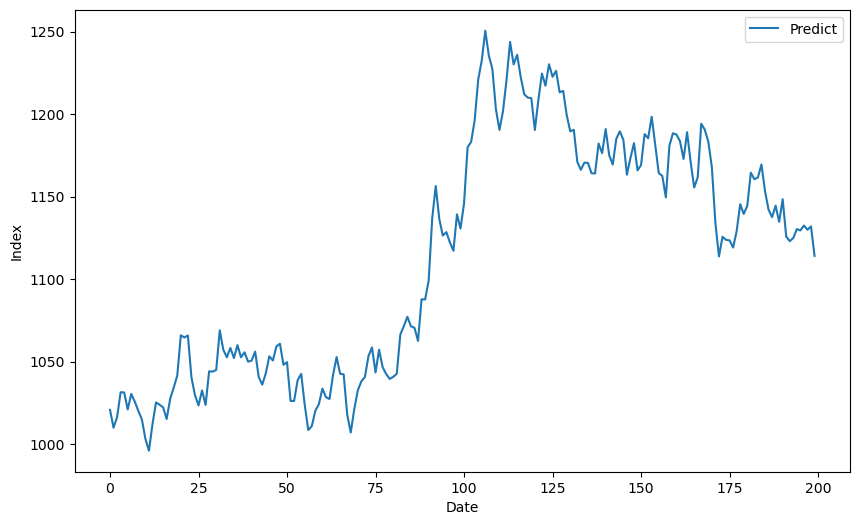

In [150]:
Image(filename=r'C:\Users\DPC\Desktop\1.png') 

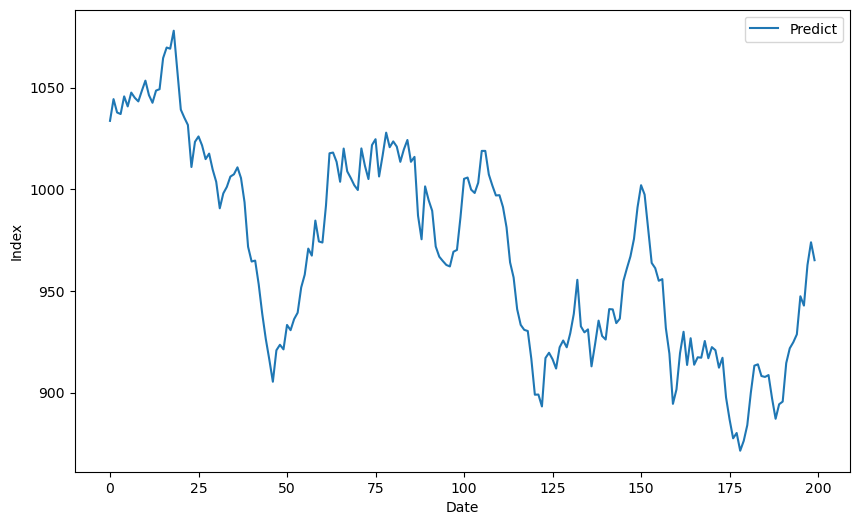

In [151]:
Image(filename=r'C:\Users\DPC\Desktop\2.png') 

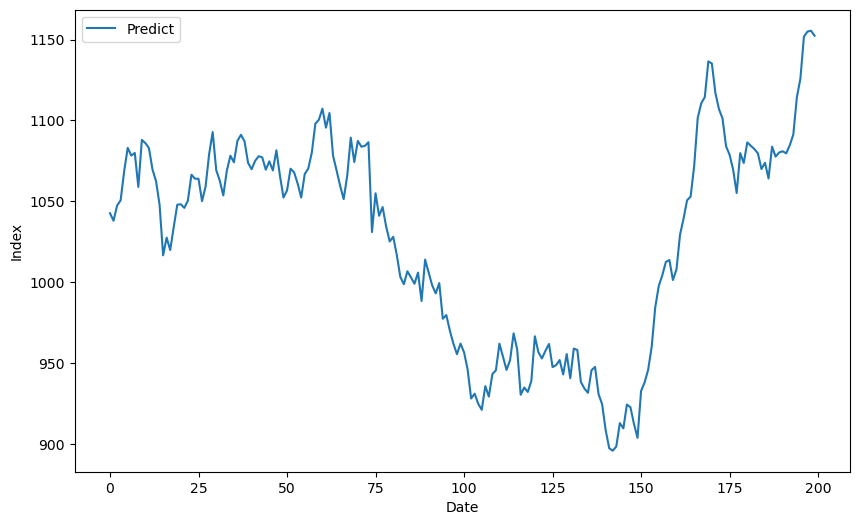

In [152]:
Image(filename=r'C:\Users\DPC\Desktop\3.png') 

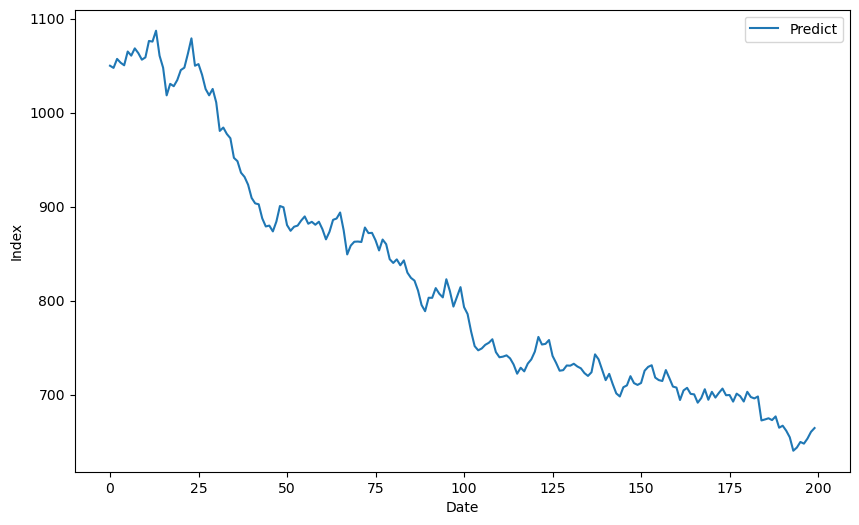

In [153]:
Image(filename=r'C:\Users\DPC\Desktop\4.png') 

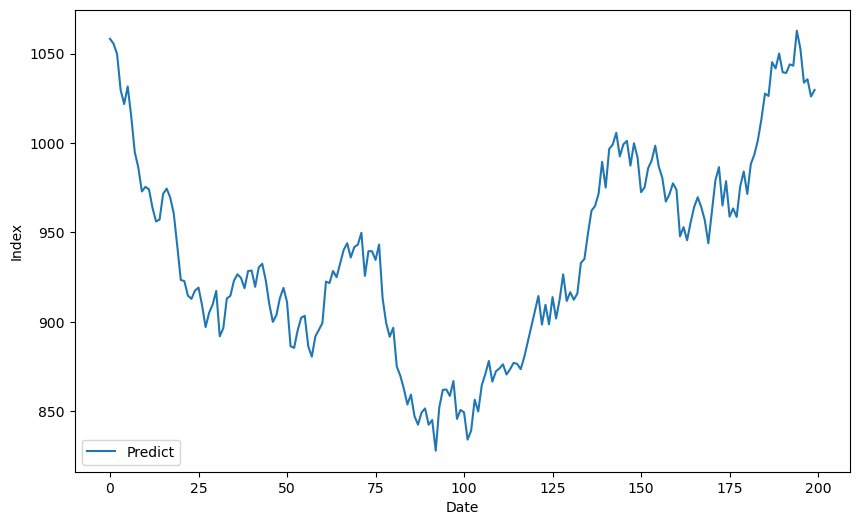

In [154]:
Image(filename=r'C:\Users\DPC\Desktop\5.png') 

# About the Authors:

My name is Nguyen Hung Truong, I am currently a research consultant at Worldquant investment LLC. My main job is to focus on studying patterns to come up with optimal strategies in stock trading.